<a href="https://colab.research.google.com/github/hxviet/brain-bleed-segmentation/blob/main/ICH_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

## Installing

In [ ]:
%pip install torch torchvision torchaudio triton

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjit

In [ ]:
!rm -r nnUNet
!git clone https://github.com/hxviet/nnUNet.git && \
    cd nnUNet && \
    git checkout -b project/ich-segmentation && \
    git merge origin/feature/normalization && \
    git merge origin/fix/ensemble-folders

rm: cannot remove 'nnUNet': No such file or directory
Cloning into 'nnUNet'...
remote: Enumerating objects: 14013, done.
remote: Counting objects: 100% (156/156), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 14013 (delta 116), reused 83 (delta 83), pack-reused 13857 (from 2)
Receiving objects: 100% (14013/14013), 8.63 MiB | 27.45 MiB/s, done.
Resolving deltas: 100% (10670/10670), done.
Switched to a new branch 'project/ich-segmentation'
Updating f1851fb..4f17e8d
Fast-forward
 documentation/explanation_normalization.md         |  2 ++
 .../normalization/custom_normalization_schemes.py  | 41 ++++++++++++++++++++++
 .../map_channel_name_to_normalization.py           |  3 ++
 3 files changed, 46 insertions(+)
 create mode 100644 nnunetv2/preprocessing/normalization/custom_normalization_schemes.py
Committer identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set you

In [ ]:
%cd nnUNet
%pip install -e .
%cd /content

/content/nnUNet
Obtaining file:///content/nnUNet
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 120.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 10.5 MB/s eta 0:00:00
  Building

/content


In [ ]:
%pip install --upgrade git+https://github.com/FabianIsensee/hiddenlayer.git

  Cloning https://github.com/FabianIsensee/hiddenlayer.git to /tmp/pip-req-build-5t1bjshj
  Running command git clone --filter=blob:none --quiet https://github.com/FabianIsensee/hiddenlayer.git /tmp/pip-req-build-5t1bjshj
  Resolved https://github.com/FabianIsensee/hiddenlayer.git to commit b7263b6dc4569da1b6dea5964e1eac78fa32fa77
  Preparing metadata (setup.py) ... done
  Created wheel for hiddenlayer: filename=hiddenlayer-0.2-py3-none-any.whl size=20004 sha256=5b4f8d9eeb4f53fd2dc8c474e45b4cce1fa89dd37f6d2c4119fc7b450743c73b
  Stored in directory: /tmp/pip-ephem-wheel-cache-amgu8zo7/wheels/5e/bb/33/76bf11a993485ba52708dbbb7f9612cbb8bb640d4580967ab1
Successfully built hiddenlayer


## Importing

In [ ]:
import IPython
import torch._dynamo
import numpy as np
import nibabel as nib
from tqdm.auto import tqdm
import pandas as pd
import kagglehub
from nnUNet.nnunetv2.ensembling.ensemble import ensemble_folders

from google.colab import drive, userdata, runtime

import json
import os, shutil
import random
from time import time, sleep
from IPython.display import display, Image

from data_utils import background_segmentation_mask
from eval_utils import evaluate_test_set, analyze_nnUNet_summary

# Data sources

## Kaggle - original dataset

In [ ]:
kaggle_BHSD_path = kagglehub.dataset_download('hoangxuanviet/multiclass-brain-hemorrhage-segmentation')

print('Kaggle data source import complete.')

## Google Drive - raw data, preprocessed data, results

In [ ]:
drive.mount('/content/drive', force_remount=True)

gdrive_nnUNet_raw_path = userdata.get('gdrive_nnUNet_raw_path')
gdrive_nnUNet_preprocessed_path = userdata.get('gdrive_nnUNet_preprocessed_path')
gdrive_nnUNet_results_path = userdata.get('gdrive_nnUNet_results_path')

gdrive_BHSD_name = userdata.get('gdrive_BHSD_name') #must be "DatasetXXX_<whatever>", where each X is a digit, e.g., "Dataset011_BHSD"
BHSD_id = int(gdrive_BHSD_name[7:10])

Mounted at /content/drive


# Data paths for nnUNet

In [ ]:
os.environ['nnUNet_raw'] = '/content/nnUNet_raw'
os.environ['nnUNet_preprocessed'] = '/content/nnUNet_preprocessed'
os.environ['nnUNet_results'] = gdrive_nnUNet_results_path

!mkdir -p $nnUNet_raw $nnUNet_preprocessed $nnUNet_results

# Raw dataset

In [ ]:
train_imgs_path = os.path.join(os.environ['nnUNet_raw'], gdrive_BHSD_name, 'imagesTr')

train_labels_path = os.path.join(os.environ['nnUNet_raw'], gdrive_BHSD_name, 'labelsTr')

test_imgs_path = os.path.join(os.environ['nnUNet_raw'], gdrive_BHSD_name, 'imagesTs')

test_labels_path = os.path.join(os.environ['nnUNet_raw'], gdrive_BHSD_name, 'labelsTs')

dataset_json_path = os.path.join(os.environ['nnUNet_raw'], gdrive_BHSD_name, 'dataset.json')

## Creating raw dataset

In [ ]:
!rm -r $nnUNet_raw

for dir in [train_imgs_path, train_labels_path, test_imgs_path, test_labels_path]:
    os.makedirs(dir, exist_ok=True)

In [ ]:
with open(f'{kaggle_BHSD_path}/dataset.json') as f:
    old_json_data = json.load(f)

### New dataset.json

In [ ]:
new_json_data = {
    "labels": {
        "background": 0,
        "epidural": 1,
        "intraparenchymal": 2,
        "intraventricular": 3,
        "subarachnoid": 4,
        "subdural": 5
    },
    "channel_names": {
        "0": "CT"
    },
    "numTraining": 296,
    "file_ending": ".nii.gz",
    "overwrite_image_reader_writer": "NibabelIO"
}

with open(os.path.join(os.environ['nnUNet_raw'], gdrive_BHSD_name, 'dataset.json'), 'w', encoding='utf-8') as f:
  json.dump(new_json_data, f, ensure_ascii=False, indent=4)

### Training set - labelled positive cases

In [ ]:
for d in tqdm(old_json_data['training'],
              desc=f'Adding labelled positive cases to train set',
              unit='files'):
    old_filename = os.path.splitext(os.path.basename(d['image']))[0] #caseID.nii

    old_img_path = f'{kaggle_BHSD_path}/label_192/images/{old_filename}'
    new_img_path = f'{train_imgs_path}/{os.path.splitext(old_filename)[0]}_0000.nii.gz'
    nib.load(old_img_path).to_filename(new_img_path) # convert to .nii.gz

    old_label_path = f'{kaggle_BHSD_path}/label_192/ground truths/{old_filename}'
    new_label_path = f'{train_labels_path}/{os.path.splitext(old_filename)[0]}.nii.gz'
    nib.load(old_label_path).to_filename(new_label_path) # convert to .nii.gz

### Training set - 200 negative cases

#### Choosing 200 random negative scans

Many negative scans in the BHSD dataset have signs of erroneous data.
* Some have different affines represented by the sform and the qform although the sform code and qform code are both 1 (RAS+ scanner). This might not necessarily be an error, but without knowing exactly why this happens it is best that we avoid using these scans.
* Some have an affine matrix with a zero row or zero column, indicating a physical axis with zero spacing or a redundant voxel axis. On loading these scans, NiBabel prints the message `pixdim[1,2,3] should be non-zero; setting 0 dims to 1`.

These scans need to be removed first before we randomly choose 200 negative scans.

In [ ]:
negative_scans_dir = f'{kaggle_BHSD_path}/unlabel_2000/nobleed'
tolerance = 1e-6  # Numerical tolerance for comparisons

valid_files = []


for fname in tqdm(os.listdir(negative_scans_dir),
                  desc=f"Finding valid negative scans",
                  unit="files"):
    filepath = f'{negative_scans_dir}/{fname}'
    is_valid = True

    try:
        img = nib.Nifti1Image.from_filename(filepath)
        header = img.header

        # Get sform and qform matrices and their codes
        sform = header.get_sform()
        qform = header.get_qform()
        sform_code = int(header['sform_code'])
        qform_code = int(header['qform_code'])

        # Check if neither sform nor qform is valid
        if sform_code == 0 and qform_code == 0:
            print(f"Invalid: {filepath} - Neither sform nor qform is valid")
            is_valid = False

        # Check sform for all-zero rows/columns if it has a valid code
        if sform_code > 0:
            for i in range(3):
                if np.all(np.abs(sform[i, 0:3]) < tolerance):
                    print(f"Invalid: {filepath} - Zero sform row {i+1}")
                    is_valid = False
                    break

                if np.all(np.abs(sform[0:3, i]) < tolerance):
                    print(f"Invalid: {filepath} - Zero sform column {i+1}")
                    is_valid = False
                    break

        # Check qform for all-zero rows/columns if it has a valid code
        if qform_code > 0:
            for i in range(3):
                if np.all(np.abs(qform[i, 0:3]) < tolerance):
                    print(f"Invalid: {filepath} - Zero qform row {i+1}")
                    is_valid = False
                    break

                if np.all(np.abs(qform[0:3, i]) < tolerance):
                    print(f"Invalid: {filepath} - Zero qform column {i+1}")
                    is_valid = False
                    break

        # Check sform-qform mismatch only if both look valid bythemselves
        if is_valid:
            max_difference = np.max(np.abs(sform - qform))
            if max_difference > tolerance:
                print(f"INVALID SCAN: {filepath} - sform-qform mismatch (max element-wise difference = {max_difference:.6f})")
                is_valid = False

        # If all checks passed, add to valid files list
        if is_valid:
            valid_files.append(filepath)

    except Exception as e:
        print(f"ERROR: {filepath} - {str(e)}")

print(f"Found {len(valid_files)} valid files")

In [ ]:
num_negative_scans = 200

print('Selecting', num_negative_scans, 'random negative scan files from', len(valid_files), 'valid files...')
valid_files.sort()
random.seed(42)
negative_scans_subset = random.sample(valid_files, num_negative_scans)

for old_img_path in tqdm(negative_scans_subset,
                      desc=f'Adding negative scans to training set',
                      unit='files'):
    case_id = os.path.splitext(os.path.basename(old_img_path))[0]
    new_img_path = f'{train_imgs_path}/{case_id}_0000.nii.gz'
    nib.load(old_img_path).to_filename(new_img_path) # convert to .nii.gz

#### Creating all-background segmentation masks

In [ ]:
for fpath in tqdm(negative_scans_subset,
                  desc=f'Adding seg. masks of negative cases to training set',
                  unit='files'):
    try:
        # create the mask
        img = nib.Nifti1Image.from_filename(fpath)
        mask_nifti = background_segmentation_mask(img)
        # save the mask
        case_id = os.path.splitext(os.path.basename(fpath))[0] #no file extension
        mask_nifti.to_filename(f'{train_labels_path}/{case_id}.nii.gz')
    except Exception as e:
        print(f"ERROR: Unexpected error when processing file {fpath}: {str(e)}")

### Test set

In [ ]:
for p in tqdm(old_json_data['test'], desc=f'Creating test set', unit='files'):
    old_filename = os.path.splitext(os.path.basename(p))[0] #caseID.nii

    old_img_path = f'{kaggle_BHSD_path}/label_192/images/{old_filename}'
    new_img_path = f'{test_imgs_path}/{os.path.splitext(old_filename)[0]}_0000.nii.gz'
    nib.load(old_img_path).to_filename(new_img_path) # convert to .nii.gz

    old_label_path = f'{kaggle_BHSD_path}/label_192/ground truths/{old_filename}'
    new_label_path = f'{test_labels_path}/{os.path.splitext(old_filename)[0]}.nii.gz'
    nib.load(old_label_path).to_filename(new_label_path) # convert to .nii.gz

### Saving raw dataset to my Google Drive

In [ ]:
!rm -r {gdrive_nnUNet_raw_path}/{gdrive_BHSD_name}
!mkdir -p {gdrive_nnUNet_raw_path}/{gdrive_BHSD_name}
_ = shutil.copytree(f"{os.environ['nnUNet_raw']}/{gdrive_BHSD_name}", f"{gdrive_nnUNet_raw_path}/{gdrive_BHSD_name}", dirs_exist_ok=True)

## Loading dataset.json from my Google Drive

In [ ]:
os.makedirs(os.path.dirname(dataset_json_path), exist_ok=True)

_ = shutil.copy2(f"{gdrive_nnUNet_raw_path}/{gdrive_BHSD_name}/dataset.json", dataset_json_path)

## Loading raw training set from my Google Drive

In [ ]:
!rm -r {train_imgs_path} {train_labels_path}
_ = shutil.copytree(f"{gdrive_nnUNet_raw_path}/{gdrive_BHSD_name}/imagesTr", train_imgs_path, dirs_exist_ok=True)
_ = shutil.copytree(f"{gdrive_nnUNet_raw_path}/{gdrive_BHSD_name}/labelsTr", train_labels_path, dirs_exist_ok=True)

rm: cannot remove '/content/nnUNet_raw/Dataset011_BHSD': No such file or directory


'/content/nnUNet_raw/Dataset011_BHSD'

## Loading raw test set from my Google Drive

In [ ]:
!rm -r {test_imgs_path} {test_labels_path}
_ = shutil.copytree(f"{gdrive_nnUNet_raw_path}/{gdrive_BHSD_name}/imagesTs", test_imgs_path, dirs_exist_ok=True)
_ = shutil.copytree(f"{gdrive_nnUNet_raw_path}/{gdrive_BHSD_name}/labelsTs", test_labels_path, dirs_exist_ok=True)

rm: cannot remove '/content/nnUNet_raw/Dataset011_BHSD/imagesTs': No such file or directory
rm: cannot remove '/content/nnUNet_raw/Dataset011_BHSD/labelsTs': No such file or directory


# Experiment plan and preprocessed data

In [ ]:
plans_json_path = f"{os.environ['nnUNet_preprocessed']}/{gdrive_BHSD_name}/nnUNetPlans.json"

## Creating experiment plan and preprocessed data

### Extracting dataset fingerprint

In [ ]:
!nnUNetv2_extract_fingerprint -d {BHSD_id} --verify_dataset_integrity --clean

### Planning experiments

In [ ]:
!nnUNetv2_plan_experiment -d {BHSD_id}

In [ ]:
# add custom configurations to nnUNetPlans.json

with open(plans_json_path, "r") as f:
    plans_json_data = json.load(f)

plans_json_data['configurations'].update({
    "3d_fullres_ct_window_neg15_115": {
        "inherits_from": "3d_fullres",
        "normalization_schemes": [
            "CTWindowNeg15To115Normalization"
        ],
        "data_identifier": "3d_fullres_ct_window_neg15_115"
    },
    "3d_fullres_ct_window_neg100_200": {
        "inherits_from": "3d_fullres",
        "normalization_schemes": [
            "CTWindowNeg100To200Normalization"
        ],
        "data_identifier": "3d_fullres_ct_window_neg100_200"
    }
})

with open(plans_json_path, "w") as f:
    json.dump(plans_json_data, f, indent=4)

### Preprocessing data

In [ ]:
!nnUNetv2_preprocess -d {BHSD_id} -c 3d_fullres_ct_window_neg15_115 3d_fullres_ct_window_neg100_200 2d 3d_fullres

### Saving experiment plan and preprocessed data to my Google Drive

In [ ]:
!rm -r {gdrive_nnUNet_preprocessed_path}/{gdrive_BHSD_name}

!mkdir -p {gdrive_nnUNet_preprocessed_path}/{gdrive_BHSD_name}

_ = shutil.copytree(f"{os.environ['nnUNet_preprocessed']}/{gdrive_BHSD_name}", f"{gdrive_nnUNet_preprocessed_path}/{gdrive_BHSD_name}", dirs_exist_ok=True)

In [ ]:
drive.flush_and_unmount()

## Loading experiment plan from my Google Drive

In [ ]:
os.makedirs(os.path.dirname(plans_json_path), exist_ok=True)

_ = shutil.copy2(f"{gdrive_nnUNet_preprocessed_path}/{gdrive_BHSD_name}/nnUNetPlans.json", f"{os.environ['nnUNet_preprocessed']}/{gdrive_BHSD_name}/nnUNetPlans.json")

## Loading experiment plan preprocessed data from my Google Drive

In [ ]:
!rm -r {os.environ['nnUNet_preprocessed']}/{gdrive_BHSD_name}
shutil.copytree(f"{gdrive_nnUNet_preprocessed_path}/{gdrive_BHSD_name}", f"{os.environ['nnUNet_preprocessed']}/{gdrive_BHSD_name}", dirs_exist_ok=True)

rm: cannot remove '/content/nnUNet_preprocessed/Dataset011_BHSD': No such file or directory


'/content/nnUNet_preprocessed/Dataset011_BHSD'

# Supervised learning models

In [ ]:
# nnunet currently runs into errors when using torch-compile

%env nnUNet_compile=False

# torch._dynamo.config.suppress_errors = True

env: nnUNet_compile=False


## Development

### Training

#### Training 2D U-Net

In [ ]:
!nnUNetv2_train {BHSD_id} 2d 0 --val_best --npz --val

#### 3D full-resolution U-Net

In [ ]:
!nnUNetv2_train {BHSD_id} 3d_fullres 0 --val_best --npz --val

#### 3D full-resolution U-Net using CT window [-15, 115]

In [ ]:
!nnUNetv2_train {BHSD_id} 3d_fullres_ct_window_neg15_115 0 --val_best --npz

#### 3D full-resolution U-Net using CT window [-100, 200]

In [ ]:
!nnUNetv2_train {BHSD_id} 3d_fullres_ct_window_neg100_200 0 --val_best --npz

### Validation: Finding best architecture/ensemble

#### Single U-Net models and ensembles of 2 U-Nets

In [ ]:
!nnUNetv2_find_best_configuration {BHSD_id} \
    -c 3d_fullres 3d_fullres_ct_window_neg15_115 3d_fullres_ct_window_neg100_200 \
    -f 0

#### Ensemble of 3 U-Nets

In [ ]:
unet_configs = (
    # '2d',
    '3d_fullres',
    '3d_fullres_ct_window_neg15_115',
    '3d_fullres_ct_window_neg100_200',
)

unet_configs_val_dirs = [
    f"{os.environ['nnUNet_results']}/{gdrive_BHSD_name}/nnUNetTrainer__nnUNetPlans__{c}/fold_0/validation"
    for c in unet_configs
]

ensemble_val_dir = f"{os.environ['nnUNet_results']}/{gdrive_BHSD_name}/ensembles/ensemble___{'___'.join(['nnUNetTrainer__nnUNetPlans__' + c for c in unet_configs])}___0"

plans_json_path = f"{os.environ['nnUNet_preprocessed']}/{gdrive_BHSD_name}/nnUNetPlans.json"

In [ ]:
ensemble_folders(
    list_of_input_folders=unet_configs_val_dirs,
    output_folder=ensemble_val_dir,
    dataset_json_file_or_dict=dataset_json_path,
    plans_json_file_or_dict=plans_json_path,
)

In [ ]:
!nnUNetv2_determine_postprocessing \
    -i {ensemble_val_dir} \
    -ref {train_labels_path} \
    -plans_json {plans_json_path} \
    -dataset_json {dataset_json_path}

Removing all but the largest foreground region did not improve results!
Removing all but the largest component for 1 did not improve results! Dice before: 0.0 after: 0.0
Removing all but the largest component for 2 did not improve results! Dice before: 0.66669 after: 0.65511
Removing all but the largest component for 3 did not improve results! Dice before: 0.47778 after: 0.43628
Removing all but the largest component for 4 did not improve results! Dice before: 0.24424 after: 0.18537
Removing all but the largest component for 5 did not improve results! Dice before: 0.34519 after: 0.34278


In [ ]:
!nnUNetv2_evaluate_folder {train_labels_path} {ensemble_val_dir}/postprocessed \
    -djfile {dataset_json_path} \
    -pfile {os.environ['nnUNet_preprocessed']}/{gdrive_BHSD_name}/nnUNetPlans.json \
    -o {ensemble_val_dir}/summary.json \
    --chill

Using <class 'nnunetv2.imageio.nibabel_reader_writer.NibabelIO'> reader/writer


In [ ]:
f'{ensemble_val_dir}/postprocessed'

'/content/drive/MyDrive/HUST/Thesis/nnUNet_results/Dataset011_BHSD/ensembles/ensemble___nnUNetTrainer__nnUNetPlans__3d_fullres___nnUNetTrainer__nnUNetPlans__3d_fullres_ct_window_neg15_115___nnUNetTrainer__nnUNetPlans__3d_fullres_ct_window_neg100_200___0/postprocessed'

## Testing

### Getting class names

In [ ]:
with open(dataset_json_path, 'r') as f:
    dataset_json = json.load(f)

labels = dataset_json['labels']
labels = {int(class_id): class_name for class_name, class_id in labels.items()}
labels = [labels[i] for i in sorted(labels.keys())]

### Selecting model/ensemble to test

In [ ]:
inference_info_json_path = f"{os.environ['nnUNet_results']}/{gdrive_BHSD_name}/inference_information-ensemble-3d_fullres-3d_fullres_ct_window_neg15_115-3d_fullres_ct_window_neg100_200.json"

with open(inference_info_json_path) as f:
    inference_info = json.load(f)

selected_models = inference_info['best_model_or_ensemble']['selected_model_or_models']
print('Best model/ensemble:', *selected_models, sep='\n')

postprocess_file = inference_info['best_model_or_ensemble']['postprocessing_file']
plans_file = inference_info['best_model_or_ensemble']['some_plans_file']

Best model/ensemble:
{'configuration': '3d_fullres', 'plans_identifier': 'nnUNetPlans', 'trainer': 'nnUNetTrainer'}
{'configuration': '3d_fullres_ct_window_neg15_115', 'plans_identifier': 'nnUNetPlans', 'trainer': 'nnUNetTrainer'}
{'configuration': '3d_fullres_ct_window_neg100_200', 'plans_identifier': 'nnUNetPlans', 'trainer': 'nnUNetTrainer'}


### Creating output directories

In [ ]:
# output directories for nnUNetv2_predict

predict_dirs = []

for model in selected_models:
    predict_dir = f"/content/nnUNetv2_predict_output/{gdrive_BHSD_name}/{model['trainer']}__{model['plans_identifier']}__{model['configuration']}"

    predict_dirs.append(predict_dir)

    if os.path.exists(predict_dir):
        shutil.rmtree(predict_dir)
    os.makedirs(predict_dir)

In [ ]:
# output directory for nnUNetv2_ensemble

ensemble_dir = None

if len(selected_models) > 1:
    ensemble_dir = f"/content/nnUNetv2_ensemble_output/{gdrive_BHSD_name}/{postprocess_file.split('/')[-2]}"

    if os.path.exists(ensemble_dir):
        shutil.rmtree(ensemble_dir)
    os.makedirs(ensemble_dir)

In [ ]:
# output directories for nnUNetv2_apply_postprocessing

if ensemble_dir:
    postprocess_dir = f"{os.path.dirname(postprocess_file)}/test_results"
else:
    model = selected_models[0]
    postprocess_dir = f"{os.environ['nnUNet_results']}/{gdrive_BHSD_name}/{model['trainer']}__{model['plans_identifier']}__{model['configuration']}/test_results_folds_0"

if os.path.exists(postprocess_dir):
    shutil.rmtree(postprocess_dir)
os.makedirs(postprocess_dir)

### Making predictions

In [ ]:
for i, model in enumerate(selected_models):
    print('\n' + '#' * 70)
    print('Running nnUNetv2_predict with the following model:', model)
    timestamp = time()

    !nnUNetv2_predict \
        -d {gdrive_BHSD_name} \
        -i {test_imgs_path} \
        -o {predict_dirs[i]} \
        -f 0 \
        -tr {model['trainer']} \
        -c {model['configuration']} \
        -p {model['plans_identifier']} \
        -chk checkpoint_best.pth \
        -npp 4 \
        -nps 4 \
        --c \
        {'--save_probabilities' if ensemble_dir else ''}

    print(f'\nnnUNetv2_predict completed in {round(time() - timestamp, 2)} seconds')


######################################################################
Running nnUNetv2_predict with the following model: {'configuration': '3d_fullres', 'plans_identifier': 'nnUNetPlans', 'trainer': 'nnUNetTrainer'}

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 96 cases in the source folder
I am processing 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 96 cases that I would like to predict
overwrite was set to False, so I am only working on cases that haven't been predicted yet. That's 0 cases.

nnUNetv2_predict completed in 7.32 seconds

###############################################################

In [ ]:
if ensemble_dir:
    print('Running nnUNetv2_ensemble...')
    timestamp = time()

    !nnUNetv2_ensemble -i {' '.join(predict_dirs)} -o {ensemble_dir}

    print(f'nnUNetv2_ensemble completed in {round(time() - timestamp, 2)} seconds')

else:
    print('No ensembling required')

Running nnUNetv2_ensemble...
nnUNetv2_ensemble completed in 76.82 seconds


In [ ]:
print('Running nnUNetv2_apply_postprocessing...')
timestamp = time()

!nnUNetv2_apply_postprocessing \
    -i {ensemble_dir if ensemble_dir else predict_dirs[0]} \
    -o {postprocess_dir} \
    -pp_pkl_file {postprocess_file} \
    -plans_json {plans_file if os.path.exists(plans_file) else plans_json_path}

print(f'nnUNetv2_apply_postprocessing completed in {round(time() - timestamp, 2)} seconds')

Running nnUNetv2_apply_postprocessing...
nnUNetv2_apply_postprocessing completed in 7.52 seconds


### Evaluating predictions

In [ ]:
print('Evaluating test set...')
timestamp = time()
eval_results = evaluate_test_set(test_labels_path, postprocess_dir, labels, postprocess_dir)
print('Evaluation completed in', round(time() - timestamp, 2), 'seconds')

Evaluating test set...
Found 96 cases. Starting evaluation...


Processing cases:   0%|          | 0/96 [00:00<?, ?cases/s]

/content/eval_utils.py:158: RuntimeWarning: Mean of empty slice
  macro_avg = {metric: np.nanmean([per_class[c][metric] for c in range(1, num_classes)])
/content/eval_utils.py:158: RuntimeWarning: Mean of empty slice
  macro_avg = {metric: np.nanmean([per_class[c][metric] for c in range(1, num_classes)])
/content/eval_utils.py:158: RuntimeWarning: Mean of empty slice
  macro_avg = {metric: np.nanmean([per_class[c][metric] for c in range(1, num_classes)])
/content/eval_utils.py:158: RuntimeWarning: Mean of empty slice
  macro_avg = {metric: np.nanmean([per_class[c][metric] for c in range(1, num_classes)])
/content/eval_utils.py:158: RuntimeWarning: Mean of empty slice
  macro_avg = {metric: np.nanmean([per_class[c][metric] for c in range(1, num_classes)])
/content/eval_utils.py:158: RuntimeWarning: Mean of empty slice
  macro_avg = {metric: np.nanmean([per_class[c][metric] for c in range(1, num_classes)])


Calculating test set-level metrics...
Saving evaluation results...
Evaluation complete.
Evaluation completed in 65.5 seconds


In [ ]:
print('\nMetrics calculated by treating the whole test set as a single case:')
display(eval_results['global_summary_dataframe'])

print('\nMetrics calculated by averaging per-case metrics:')
display(eval_results['avg_summary_dataframe'])


Metrics calculated by treating the whole test set as a single case:


,Class ID,Class Name,precision,recall,Dice,IoU
0,1,epidural,0.464161,0.030675,0.057547,0.029626
1,2,intraparenchymal,0.818491,0.754072,0.784963,0.646040
2,3,intraventricular,0.707125,0.675943,0.691183,0.528097
3,4,subarachnoid,0.508086,0.378825,0.434036,0.277169
4,5,subdural,0.509948,0.403526,0.450538,0.290770
5,,Macro Average,0.601562,0.448608,0.483653,0.354340
6,,Merged Foreground,0.819919,0.652527,0.726708,0.570731



Metrics calculated by averaging per-case metrics:


,Class ID,Class Name,precision,recall,Dice,IoU
0,1,epidural,0.299782,0.106456,0.076061,0.052660
1,2,intraparenchymal,0.700582,0.615500,0.571808,0.476862
2,3,intraventricular,0.632881,0.596676,0.511216,0.399914
3,4,subarachnoid,0.323663,0.307830,0.214360,0.137598
4,5,subdural,0.316899,0.228268,0.165444,0.114989
5,,Macro Average,0.454762,0.370946,0.307778,0.236405
6,,Merged Foreground,0.786072,0.546685,0.586073,0.466944


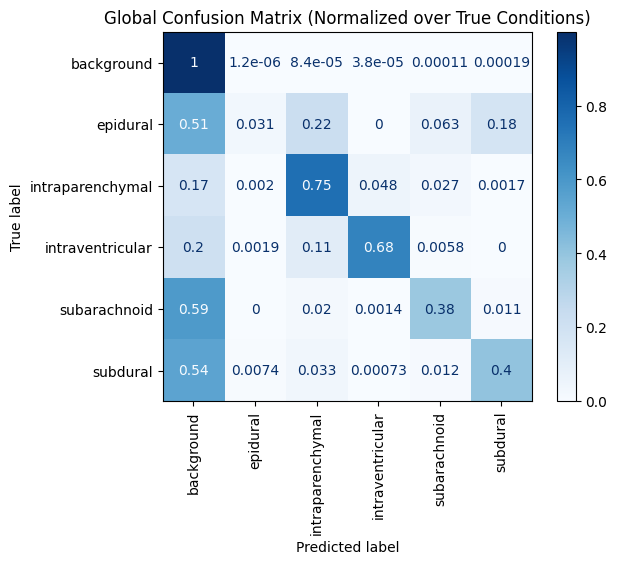

In [ ]:
display(Image(filename=f'{postprocess_dir}/global_multiclass_conf_matr.png'))

## Demo

### Getting class names

In [ ]:
with open(dataset_json_path, 'r') as f:
    dataset_json = json.load(f)

labels = dataset_json['labels']
labels = {int(class_id): class_name for class_name, class_id in labels.items()}
labels = [labels[i] for i in sorted(labels.keys())]

### Creating output directories

In [ ]:
my_models = { # my_model_name: inference_information_json_path
    # 'nnUNetTrainer__nnUNetPlans__3d_fullres': f"{os.environ['nnUNet_results']}/{gdrive_BHSD_name}/inference_information-3d_fullres.json",
    # 'nnUNetTrainer__nnUNetPlans__3d_fullres_ct_window_neg15_115': f"{os.environ['nnUNet_results']}/{gdrive_BHSD_name}/inference_information-3d_fullres_ct_window_neg15_115.json",
    # 'nnUNetTrainer__nnUNetPlans__3d_fullres_ct_window_neg100_200': f"{os.environ['nnUNet_results']}/{gdrive_BHSD_name}/inference_information-3d_fullres_ct_window_neg100_200.json",
    # 'nnUNetTrainer__nnUNetPlans__2d': f"{os.environ['nnUNet_results']}/{gdrive_BHSD_name}/inference_information-2d.json",
    'ensemble___nnUNetTrainer__nnUNetPlans__3d_fullres___nnUNetTrainer__nnUNetPlans__3d_fullres_ct_window_neg100_200___0': f"{os.environ['nnUNet_results']}/{gdrive_BHSD_name}/inference_information-ensemble.json",
}


# Create output directories for nnUNetv2_predict, nnUNetv2_ensemble, and nnUNetv2_apply_postprocessing for each model
for my_model, inference_info_path in my_models.items():
    # Load inference information
    with open(inference_info_path) as f:
        inference_info = json.load(f)

    selected_models = inference_info['best_model_or_ensemble']['selected_model_or_models']
    print('Best model/ensemble:', selected_models)

    postprocess_file = inference_info['best_model_or_ensemble']['postprocessing_file']
    plans_file = inference_info['best_model_or_ensemble']['some_plans_file']

    # output directories for nnUNetv2_predict
    predict_dirs = []
    for model in selected_models:
        predict_dir = f"/content/nnUNetv2_predict_output/{gdrive_BHSD_name}/{model['trainer']}__{model['plans_identifier']}__{model['configuration']}"
        predict_dirs.append(predict_dir)
        if os.path.exists(predict_dir):
            shutil.rmtree(predict_dir)
        os.makedirs(predict_dir)

    # output directory for nnUNetv2_ensemble
    ensemble_dir = None
    if len(selected_models) > 1:
        ensemble_dir = f"/content/nnUNetv2_ensemble_output/{gdrive_BHSD_name}/{postprocess_file.split('/')[-2]}"
        if os.path.exists(ensemble_dir):
            shutil.rmtree(ensemble_dir)
        os.makedirs(ensemble_dir)

    # output directories for nnUNetv2_apply_postprocessing
    postprocess_dir = f"/content/nnUNetv2_apply_postprocessing_output/{gdrive_BHSD_name}/{my_model}"
    if os.path.exists(postprocess_dir):
        shutil.rmtree(postprocess_dir)
    os.makedirs(postprocess_dir)


# Create final output directory where output files in postprocess_dir will be copied to and renamed with my_model name appended
final_output_dir = f"/content/nnUNetv2_final_output/{gdrive_BHSD_name}"
os.makedirs(final_output_dir, exist_ok=True)

Best model/ensemble: [{'configuration': '3d_fullres', 'plans_identifier': 'nnUNetPlans', 'trainer': 'nnUNetTrainer'}, {'configuration': '3d_fullres_ct_window_neg100_200', 'plans_identifier': 'nnUNetPlans', 'trainer': 'nnUNetTrainer'}]


### Selecting a random sample from test set

In [ ]:
#select a random test case
test_cases = os.listdir(test_imgs_path)
random_case = random.choice(test_cases)
print(f'Selected random test case: {random_case}')

#copy to a new directory
random_case_dir = f'/content/random_test_case/'
if os.path.exists(random_case_dir):
    shutil.rmtree(random_case_dir)
os.makedirs(random_case_dir, exist_ok=True)
#copy the image and label files
shutil.copy2(f'{test_imgs_path}/{random_case}', f'{random_case_dir}/{random_case}')

Selected random test case: ID_a40e10b0_ID_18c55dad14_0000.nii.gz


'/content/random_test_case//ID_a40e10b0_ID_18c55dad14_0000.nii.gz'

### Making predictions

In [ ]:
for my_model, inference_info_path in my_models.items():
    print('\n' + '#' * 70)
    print(f'Running inference for model: {my_model}')

    #1. Load inference information
    with open(inference_info_path) as f:
        inference_info = json.load(f)
    selected_models = inference_info['best_model_or_ensemble']['selected_model_or_models']
    postprocess_file = inference_info['best_model_or_ensemble']['postprocessing_file']
    plans_file = inference_info['best_model_or_ensemble']['some_plans_file']
    # output directories for nnUNetv2_predict
    predict_dirs = []
    for model in selected_models:
        predict_dir = f"/content/nnUNetv2_predict_output/{gdrive_BHSD_name}/{model['trainer']}__{model['plans_identifier']}__{model['configuration']}"
        predict_dirs.append(predict_dir)
    # output directory for nnUNetv2_ensemble
    ensemble_dir = None
    if len(selected_models) > 1:
        ensemble_dir = f"/content/nnUNetv2_ensemble_output/{gdrive_BHSD_name}/{postprocess_file.split('/')[-2]}"
    # output directories for nnUNetv2_apply_postprocessing
    postprocess_dir = f"/content/nnUNetv2_apply_postprocessing_output/{gdrive_BHSD_name}/{my_model}"


    #2. Run nnUNetv2_predict for each selected model in my model
    for i, model in enumerate(selected_models):
        print('Running nnUNetv2_predict with the following model:', model)
        timestamp = time()
        !nnUNetv2_predict \
            -d {gdrive_BHSD_name} \
            -i {random_case_dir} \
            -o {predict_dirs[i]} \
            -f 0 \
            -tr {model['trainer']} \
            -c {model['configuration']} \
            -p {model['plans_identifier']} \
            -chk checkpoint_best.pth \
            {'--save_probabilities' if ensemble_dir else ''}
        print(f'\nnnUNetv2_predict completed in {round(time() - timestamp, 2)} seconds')


    #3. Run nnUNetv2_ensemble
    if ensemble_dir:
        print('Running nnUNetv2_ensemble...')
        timestamp = time()
        !nnUNetv2_ensemble -i {' '.join(predict_dirs)} -o {ensemble_dir}
        print(f'nnUNetv2_ensemble completed in {round(time() - timestamp, 2)} seconds')
    else:
        print('No ensembling required')


    #4. Run nnUNetv2_apply_postprocessing
    print('Running nnUNetv2_apply_postprocessing...')
    timestamp = time()
    !nnUNetv2_apply_postprocessing \
        -i {ensemble_dir if ensemble_dir else predict_dirs[0]} \
        -o {postprocess_dir} \
        -pp_pkl_file {postprocess_file} \
        -plans_json {plans_file}
    print(f'nnUNetv2_apply_postprocessing completed in {round(time() - timestamp, 2)} seconds')


    #5. Copy the output files to the final output directory and rename them to caseID_my_model.nii.gz
    for file in os.listdir(postprocess_dir):
        if file.endswith('.nii.gz'):
            old_file_path = os.path.join(postprocess_dir, file)
            new_file_name = f"{random_case.split('.')[0]}_{my_model}.nii.gz"
            new_file_path = os.path.join(final_output_dir, new_file_name)
            shutil.copy2(old_file_path, new_file_path)
            print(f'Copied {old_file_path} to {new_file_path}')


######################################################################
Running inference for model: nnUNetTrainer__nnUNetPlans__3d_fullres_ensemble
Running nnUNetv2_predict with the following model: {'configuration': '3d_fullres', 'plans_identifier': 'nnUNetPlans', 'trainer': 'nnUNetTrainer'}

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 1 cases in the source folder
I am processing 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 1 cases that I would like to predict

Predicting ID_a40e10b0_ID_18c55dad14:
perform_everything_on_device: True
100% 36/36 [00:08<00:00,  4.15it/s]
sending off prediction to back

# Terminating Colab session

In [ ]:
sleep(60)
drive.flush_and_unmount()
sleep(60)
runtime.unassign()

# References

1. Wu et al. "BHSD: A 3D Multi-class Brain Hemorrhage Segmentation Dataset". MLMI. 2023. https://link.springer.com/chapter/10.1007/978-3-031-45673-2_15
2. Isensee et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation". Nature Methods. 2020. https://www.nature.com/articles/s41592-020-01008-z
3. Brett et al. “nipy/nibabel: 5.3.1”. Zenodo. 2024. https://doi.org/10.5281/zenodo.13936989